In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from collections import Counter

In [8]:
tr_input=pd.read_csv('tcp_train.csv')
ts_input=pd.read_csv('tcp_test.csv')

In [9]:
df=pd.concat([tr_input,ts_input], axis=0)

In [10]:
df.shape

(7043, 21)

In [11]:
df.dtypes

Churn                object
Contract             object
Dependents           object
DeviceProtection     object
InternetService      object
MonthlyCharges      float64
MultipleLines        object
OnlineBackup         object
OnlineSecurity       object
PaperlessBilling     object
Partner              object
PaymentMethod        object
PhoneService         object
SeniorCitizen         int64
StreamingMovies      object
StreamingTV          object
TechSupport          object
TotalCharges        float64
customerID           object
gender               object
tenure                int64
dtype: object

In [12]:
df.dropna()

,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,customerID,gender,tenure
0,No,One year,No,Yes,DSL,42.30,No phone service,No,Yes,No,...,Bank transfer (automatic),No,0,No,No,Yes,1840.75,7795-CFOCW,Male,45
1,Yes,Month-to-month,No,No,Fiber optic,70.70,No,No,No,Yes,...,Electronic check,Yes,0,No,No,No,151.65,9237-HQITU,Female,2
2,Yes,Month-to-month,No,Yes,Fiber optic,99.65,Yes,No,No,Yes,...,Electronic check,Yes,0,Yes,Yes,No,820.50,9305-CDSKC,Female,8
3,No,Month-to-month,Yes,No,Fiber optic,89.10,Yes,Yes,No,Yes,...,Credit card (automatic),Yes,0,No,Yes,No,1949.40,1452-KIOVK,Male,22
4,No,Month-to-month,No,No,DSL,29.75,No phone service,No,Yes,No,...,Mailed check,No,0,No,No,No,301.90,6713-OKOMC,Female,10
5,Yes,Month-to-month,No,Yes,Fiber optic,104.80,Yes,No,No,Yes,...,Electronic check,Yes,0,Yes,Yes,Yes,3046.05,7892-POOKP,Female,28
6,No,Month-to-month,Yes,No,DSL,49.95,No,No,Yes,Yes,...,Mailed check,Yes,0,No,No,No,587.45,9763-GRSKD,Male,13
7,No,Two year,No,No internet service,No,18.95,No,No internet service,No internet service,No,...,Credit card (automatic),Yes,0,No internet service,No internet service,No internet service,326.80,7469-LKBCI,Male,16
8,Yes,Month-to-month,No,Yes,Fiber optic,103.70,Yes,Yes,No,Yes,...,Bank transfer (automatic),Yes,0,Yes,Yes,No,5036.30,0280-XJGEX,Male,49
9,No,Month-to-month,No,Yes,Fiber optic,105.50,No,No,Yes,Yes,...,Electronic check,Yes,0,Yes,Yes,Yes,2686.05,5129-JLPIS,Male,25


In [13]:
df1 = df.drop('customerID',1)

In [14]:
df1.columns

Index([u'Churn', u'Contract', u'Dependents', u'DeviceProtection',
       u'InternetService', u'MonthlyCharges', u'MultipleLines',
       u'OnlineBackup', u'OnlineSecurity', u'PaperlessBilling', u'Partner',
       u'PaymentMethod', u'PhoneService', u'SeniorCitizen', u'StreamingMovies',
       u'StreamingTV', u'TechSupport', u'TotalCharges', u'gender', u'tenure'],
      dtype='object')

In [15]:
df1.shape

(7043, 20)

In [16]:
df1.dropna().shape

(5627, 20)

In [17]:
df1.dtypes

Churn                object
Contract             object
Dependents           object
DeviceProtection     object
InternetService      object
MonthlyCharges      float64
MultipleLines        object
OnlineBackup         object
OnlineSecurity       object
PaperlessBilling     object
Partner              object
PaymentMethod        object
PhoneService         object
SeniorCitizen         int64
StreamingMovies      object
StreamingTV          object
TechSupport          object
TotalCharges        float64
gender               object
tenure                int64
dtype: object

In [18]:
Counter(df1['Churn'])

Counter({nan: 1409, 'No': 4139, 'Yes': 1495})

In [19]:
df1.dropna(inplace=True)

In [20]:
Counter(df1['Churn'])

Counter({'No': 4132, 'Yes': 1495})

In [21]:
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No', value=0, inplace=True)

In [22]:
dfd = pd.get_dummies(df1)
dfd.head()

,Churn,MonthlyCharges,SeniorCitizen,TotalCharges,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male
0,0,42.30,0,1840.75,45,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1,1,70.70,0,151.65,2,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,99.65,0,820.50,8,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
3,0,89.10,0,1949.40,22,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0,29.75,0,301.90,10,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [23]:
dfd.shape

(5627, 46)

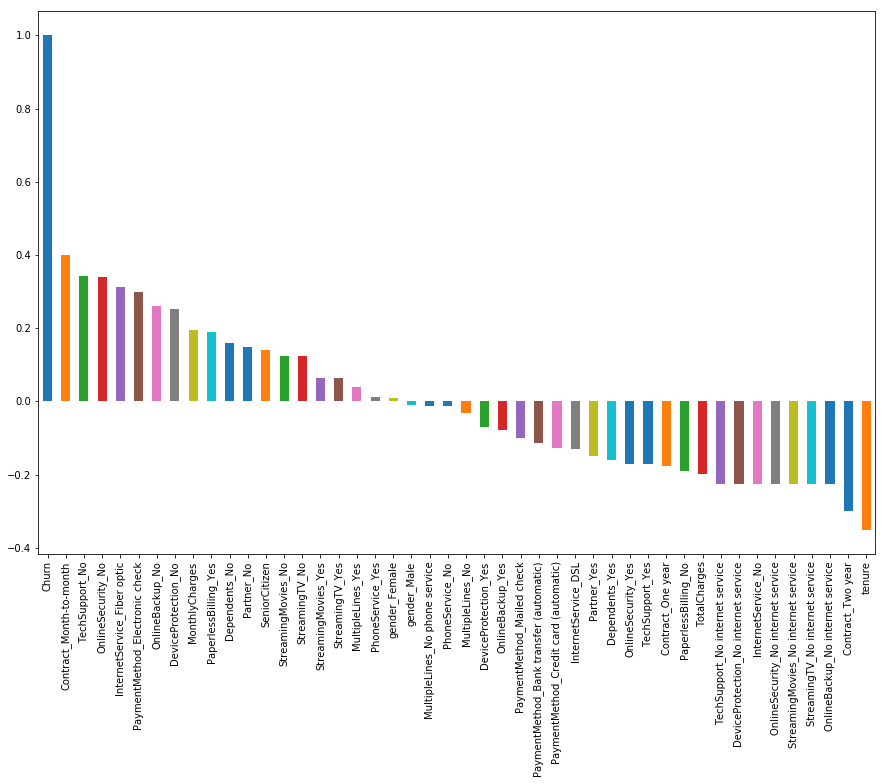

In [24]:
plt.figure(figsize=(15,10))
dfd.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

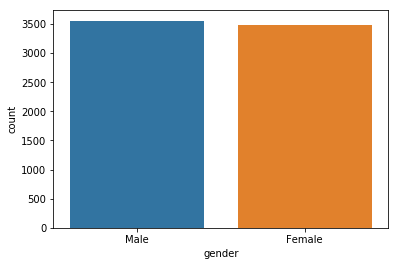

In [25]:
sns.countplot(df['gender'], data=df)

Text(0.5,1,'% of Senior Citizens')

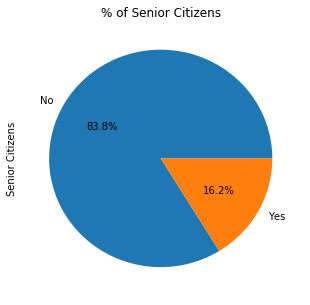

In [26]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5))                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens')
ax.set_title('% of Senior Citizens')

In [27]:
df.columns

Index([u'Churn', u'Contract', u'Dependents', u'DeviceProtection',
       u'InternetService', u'MonthlyCharges', u'MultipleLines',
       u'OnlineBackup', u'OnlineSecurity', u'PaperlessBilling', u'Partner',
       u'PaymentMethod', u'PhoneService', u'SeniorCitizen', u'StreamingMovies',
       u'StreamingTV', u'TechSupport', u'TotalCharges', u'customerID',
       u'gender', u'tenure'],
      dtype='object')

In [28]:
pd.crosstab(df['Dependents'], df['Partner'])

Partner,No,Yes
Dependents,,
No,3280,1653
Yes,361,1749


In [29]:
df.head()

,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,customerID,gender,tenure
0,No,One year,No,Yes,DSL,42.30,No phone service,No,Yes,No,...,Bank transfer (automatic),No,0,No,No,Yes,1840.75,7795-CFOCW,Male,45
1,Yes,Month-to-month,No,No,Fiber optic,70.70,No,No,No,Yes,...,Electronic check,Yes,0,No,No,No,151.65,9237-HQITU,Female,2
2,Yes,Month-to-month,No,Yes,Fiber optic,99.65,Yes,No,No,Yes,...,Electronic check,Yes,0,Yes,Yes,No,820.50,9305-CDSKC,Female,8
3,No,Month-to-month,Yes,No,Fiber optic,89.10,Yes,Yes,No,Yes,...,Credit card (automatic),Yes,0,No,Yes,No,1949.40,1452-KIOVK,Male,22
4,No,Month-to-month,No,No,DSL,29.75,No phone service,No,Yes,No,...,Mailed check,No,0,No,No,No,301.90,6713-OKOMC,Female,10


In [30]:
df.dtypes

Churn                object
Contract             object
Dependents           object
DeviceProtection     object
InternetService      object
MonthlyCharges      float64
MultipleLines        object
OnlineBackup         object
OnlineSecurity       object
PaperlessBilling     object
Partner              object
PaymentMethod        object
PhoneService         object
SeniorCitizen         int64
StreamingMovies      object
StreamingTV          object
TechSupport          object
TotalCharges        float64
customerID           object
gender               object
tenure                int64
dtype: object

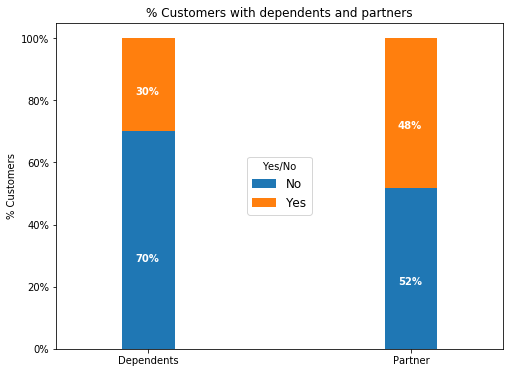

In [31]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)

ax = df3.loc[:,'customerID'].plot.bar(stacked=True, 
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners')
ax.legend(loc = 'center',prop={'size':12},title = "Yes/No")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

C:\Users\Admin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


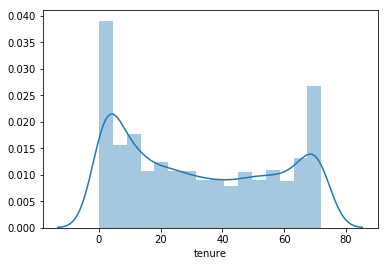

In [32]:
sns.distplot(df['tenure'])

In [33]:
df.columns

Index([u'Churn', u'Contract', u'Dependents', u'DeviceProtection',
       u'InternetService', u'MonthlyCharges', u'MultipleLines',
       u'OnlineBackup', u'OnlineSecurity', u'PaperlessBilling', u'Partner',
       u'PaymentMethod', u'PhoneService', u'SeniorCitizen', u'StreamingMovies',
       u'StreamingTV', u'TechSupport', u'TotalCharges', u'customerID',
       u'gender', u'tenure'],
      dtype='object')

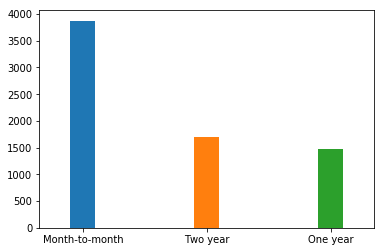

In [34]:
ac=df['Contract'].value_counts().plot(kind='bar', rot=0, width=0.2)

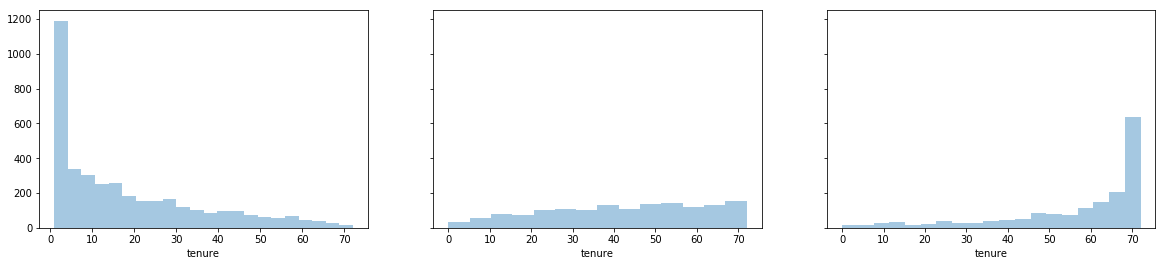

In [35]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20,4))
sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],ax=axes[0],kde=0)
sns.distplot(df[df['Contract']=='One year']['tenure'],ax=axes[1],kde=0)
sns.distplot(df[df['Contract']=='Two year']['tenure'], ax=axes[2],kde=0)

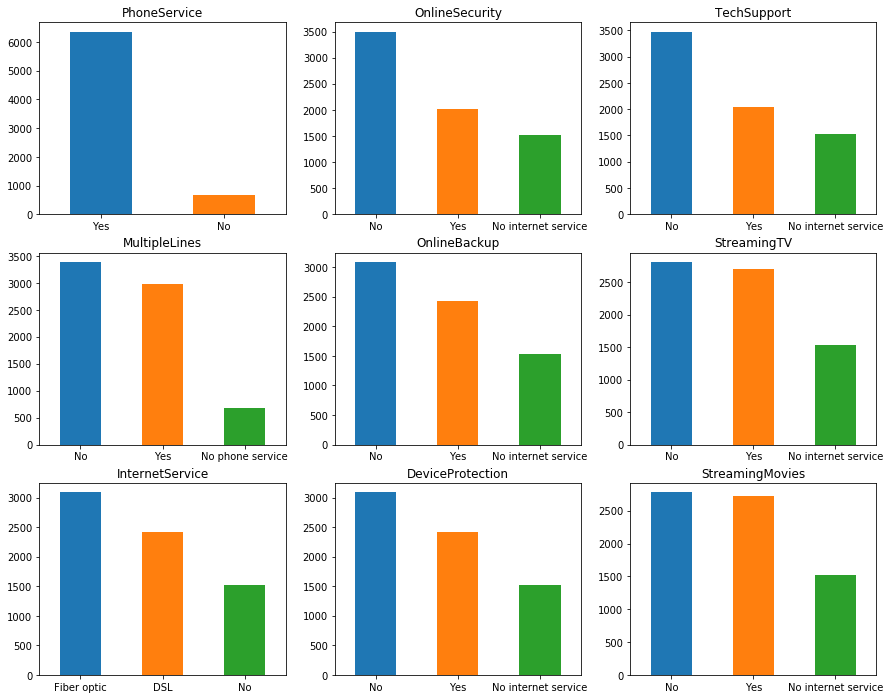

In [36]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

for i,item in enumerate(services):
    if i < 3:
        ax=df[item].value_counts().plot(kind='bar', ax=axes[i,0],rot=0)
    
    elif i>=3 and i < 6:
        ax=df[item].value_counts().plot(kind='bar', ax=axes[i-3,1],rot=0)
     
    elif i < 9:
        ax=df[item].value_counts().plot(kind='bar', ax=axes[i-6,2],rot=0)
        
    ax.set_title(item)    

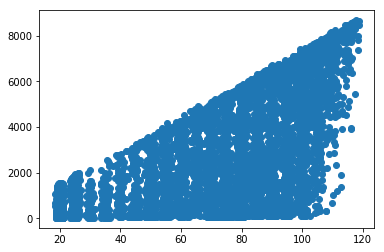

In [37]:
plt.scatter(df.MonthlyCharges, df.TotalCharges)

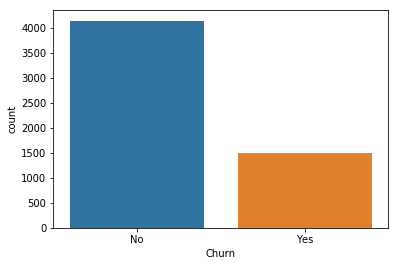

In [38]:
sns.countplot(x='Churn', data=df)

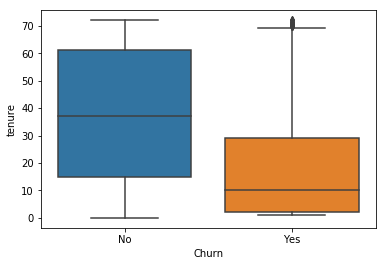

In [39]:
sns.boxplot(df['Churn'], df['tenure'])

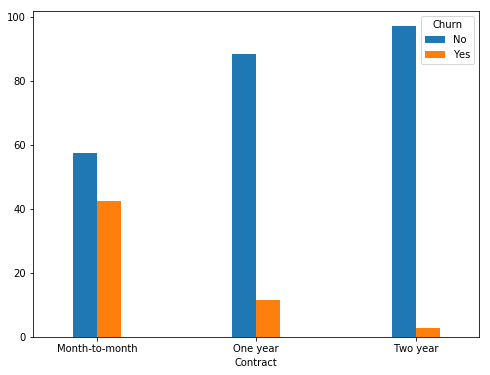

In [40]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = False,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                )

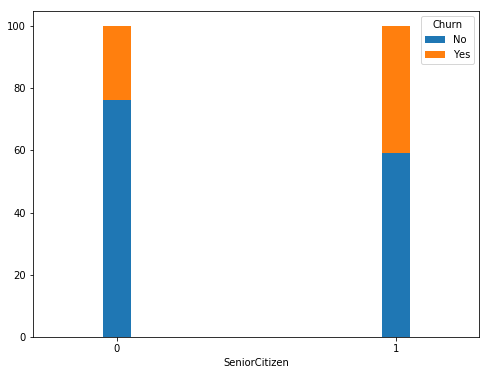

In [41]:
senior_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (senior_churn.T*100.0 / senior_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.1,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                )

Text(0.5,1,'Distribution of monthly charges by churn')

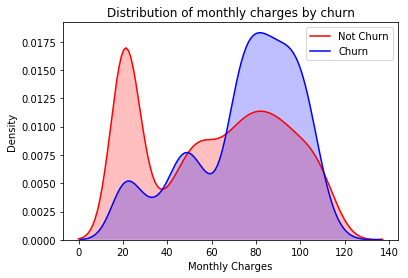

In [42]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

C:\Users\Admin\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,1,'Distribution of total charges by churn')

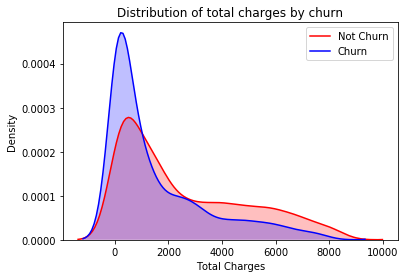

In [43]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Model Building 


Logistic Regresssion

In [44]:
y = dfd['Churn'].values
X = dfd.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
                                                    

In [45]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
                                                    
                                                    
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))                                                    

0.8058022498519835


In [46]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)

TotalCharges                               1.196393
Contract_Month-to-month                    0.638240
InternetService_Fiber optic                0.448269
PaymentMethod_Electronic check             0.263537
SeniorCitizen                              0.231593
StreamingMovies_Yes                        0.161057
TechSupport_No                             0.139739
OnlineSecurity_No                          0.129438
PaperlessBilling_Yes                       0.124986
MonthlyCharges                             0.085720
StreamingTV_Yes                            0.063453
OnlineBackup_No                            0.061015
DeviceProtection_Yes                       0.057500
PhoneService_No                            0.055879
MultipleLines_No phone service             0.055879
Dependents_No                              0.039727
MultipleLines_Yes                         -0.032972
DeviceProtection_No                       -0.072893
OnlineBackup_Yes                          -0.076408
Partner_No  

# RANDOM FOREST 

In [47]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8134991119005328


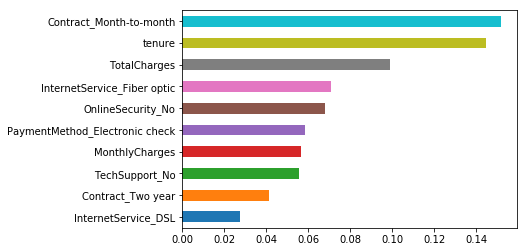

In [48]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [53]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8081705150976909

In [54]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[757  94]
 [122 153]]
